In [1]:
# Libraries

import numpy as np
import matplotlib.pyplot as plt
import scipy
import math

# Conventions

from numpy import exp
from numpy import pi
from scipy.optimize import minimize
from statistics import variance
from statistics import stdev
from statistics import mean
from scipy import stats

In [16]:
# KDE probability
class ProbKDE:

    def __init__(self, knots):
        self.knots = knots
        
    
    def gaussian(self, x):
        #xk = (x - self.knots) / h
        xk = (self.knots - x) / h
        return ((1.0 / (math.sqrt (2 * pi) * h))) * exp(-0.5 * xk ** 2)

    def papprox(self, x, weights, h):
        kers = prob_obj.gaussian(x)
        wkers = weights * kers
        return np.sum (wkers)    

#Bandwidth
def bw(u):
    return (4/3) **(1/5) * (len(u) ** (-1/5)) * stdev(u) #rule of thumb
    
#Likelihood
def m2lnL(theta):
    weights = theta[0:]

    weights = weights / np.sum (weights)

    m2lnL_a = np.array ([-2.0 * np.log (prob_obj.papprox(d, weights, h)) for d in data])

    return np.sum (m2lnL_a)


In [17]:
# knots number
kn = 20

#Generic initial weights
weights = np.ones (kn)

Optimization terminated successfully
Optimization terminated successfully
Optimization terminated successfully
Optimization terminated successfully
Optimization terminated successfully


<Figure size 432x288 with 0 Axes>

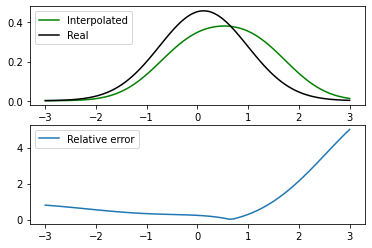

<Figure size 432x288 with 0 Axes>

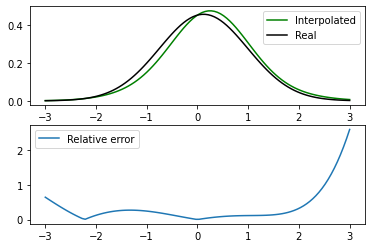

<Figure size 432x288 with 0 Axes>

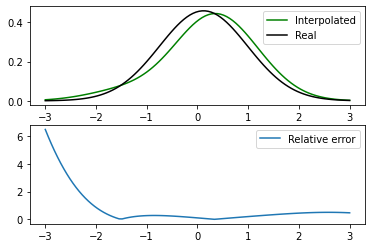

<Figure size 432x288 with 0 Axes>

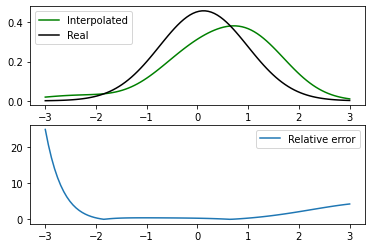

<Figure size 432x288 with 0 Axes>

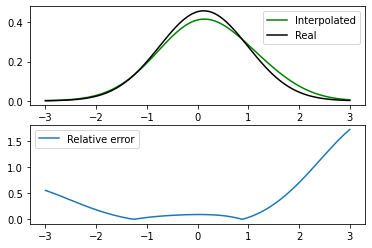

In [19]:
for i in range(5): #This run the code below 3 times
           
    data = np.random.normal (0.12, 0.87, size=kn)
    h = bw(data)
    knots = np.linspace (-3.0, 3.0, kn)
    
    prob_obj = ProbKDE(knots) #new prob. object
    
    #This minimizes the negative ln of the likelihood
    res = minimize(m2lnL, weights, method ='SLSQP', bounds = [(0, 1e10) for a in range(kn)])
    print(res.message)

    
    ##### Plot #####

    plt.figure()
    fig, axs = plt.subplots (2)

    #Interpoled weights
    weights_bf = res["x"][0:]
    weights_bf = weights_bf / np.sum(weights_bf)
    
    xv = np.linspace (-3.0, 3.0, 100)
    h = bw(xv)
        
    #Interpolated PDF
    yv = [prob_obj.papprox(x, weights_bf, xv) for x in xv]
    
    #Real PDF
    yn = (1.0 / (math.sqrt(2.0 * pi) * 0.87)) * exp (- 0.5 * ((xv - 0.12) / 0.87)**2) 
    
    
    axs[0].plot (xv, yv, c='g', label = 'Interpolated')
    axs[0].plot (xv, yn, c = 'k', label = 'Real')
    axs[0].legend()
    
    #Relative Error
    axs[1].plot(xv, abs((yv/yn) - 1),label = 'Relative error')
    axs[1].legend()
    
    #plt.yscale("log")